In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
df = pd.read_csv('drive/Shareddrives/DS340W Project/PopularityPrediction-main/INSTAGRAM FILES/merged_file_insta.csv')

In [ ]:
to_drop = ['image_id', 'Account', 'User Name', 'Post Created', 'Post Created Date', 'Post Created Time', 'Type', 'Likes', 'Comments', 'Views', 'Like and View Counts Disabled', 'URL', 'Link', 'Photo', 'Title', 'Sponsor Id', 'Sponsor Name', 'Overperforming Score'  ]


df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,True,True,True,False,1,False,False,False,False,cyan,...,46,HIGH,0,0,0,0,0,1,0,0
1,False,True,True,True,2,False,False,False,False,green,...,31,HIGH,0,0,0,0,0,1,0,0
2,False,True,True,False,1,False,False,False,False,grey,...,34,HIGH,0,1,0,0,0,0,0,0
3,True,True,True,False,1,False,False,False,True,grey,...,44,HIGH,0,1,0,0,0,0,0,0
4,True,True,False,True,1,False,False,False,False,cyan,...,58,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,True,True,True,True,2,False,False,False,False,brown,...,22,HIGH,0,1,0,0,0,1,0,0
1550,True,True,True,True,2,False,False,False,False,grey,...,103,HIGH,0,0,0,0,0,1,0,0
1551,False,True,True,True,2,True,False,False,False,grey,...,38,HIGH,0,1,0,0,1,1,0,0
1552,True,True,True,True,2,False,False,False,False,brown,...,52,HIGH,0,1,0,0,0,1,1,0


In [ ]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [ ]:
df = change_types(df)

In [ ]:
df.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
dominantColor,object


In [ ]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.7,3503589.1,10583.8,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,3881097.4,17427.2,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24423.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1274288.0,2576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7626483.2,17840.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,283074.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


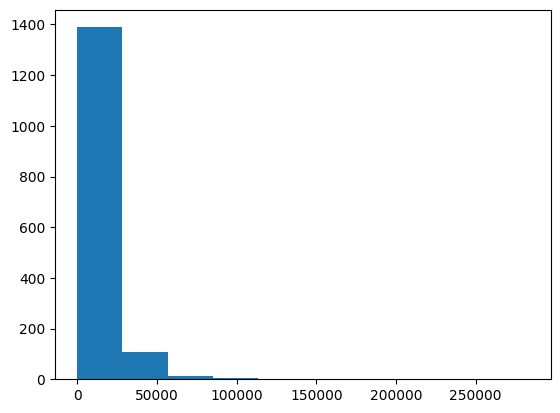

In [ ]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [ ]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [ ]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0,1368.0
mean,0.4,0.8,0.6,0.4,1.1,0.3,0.0,0.0,0.1,0.6,3005291.2,6764.7,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.2,0.5,3762862.8,8527.6,0.1,0.4,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24344.5,87.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,330523.5,1627.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,7367298.5,14687.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,9314330.0,27045.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df[df['Total Interactions']>100000].count()

,0
Child,5
Smile,5
Female,5
Male,5
PeopleNumber,5
Text,5
close_up,5
Indoors,5
Outdoors,5
dominantColor,5


In [ ]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

,0
0,4.593569
1,3.093195
2,3.393552
3,4.390779
4,5.781499
...,...
1549,4.531411
1550,21.638655
1551,7.973143
1552,10.924370


<ipython-input-14-8733ca3f5b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


,0
count,1368.000000
mean,3.975115
std,5.105046
min,0.422789
25%,2.081844
50%,2.815274
75%,4.136985
max,139.164638


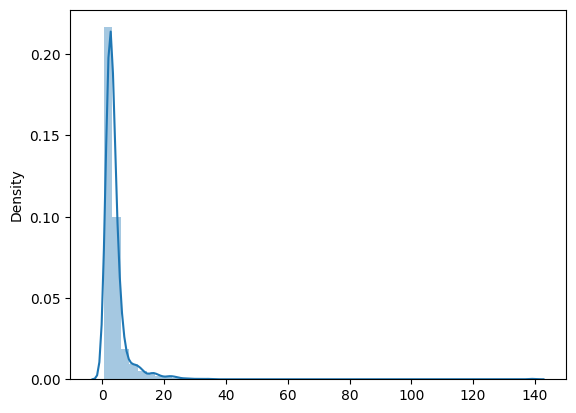

In [ ]:
sns.distplot(y)
y.describe()

In [ ]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,0,0
1550,1,1,1,1,2,0,0,0,0,grey,0,HIGH,0,0,0,0,0,1,0,0
1551,0,1,1,1,2,1,0,0,0,grey,0,HIGH,0,1,0,0,1,1,0,0
1552,1,1,1,1,2,0,0,0,0,brown,0,HIGH,0,1,0,0,0,1,1,0


In [ ]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,0,1,1,1,2,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,0,1,1,0,1,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
4,1,1,0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1,1,1,1,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1550,1,1,1,1,2,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1551,0,1,1,1,2,1,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1552,1,1,1,1,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# y = (y - y.min())/(y.max() - y.min())

In [ ]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [ ]:
X = change_types(X)
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [ ]:
print(metrics.mean_squared_error(y_test, y_pred))

print(metrics.median_absolute_error(y_test, y_pred))

print(metrics.mean_absolute_percentage_error(y_test, y_pred))

32.511801672243614
0.9012721257559364
0.712102722177923


In [ ]:
rf_reg.score(X_test, y_test)

-1.8911683908426786

In [ ]:
for imp, name in zip(rf_reg.feature_importances_, rf_reg.feature_names_in_):
    print(name, imp)

Child 0.03118873995503141
Smile 0.11349814236707118
Female 0.023818414975440703
Male 0.022461917794290773
PeopleNumber 0.10319280515003931
Text 0.11854352420407509
close_up 0.0076111137425560185
Indoors 0.003856017234907911
Outdoors 0.018870032688660887
LOGO 0.20385380082267565
ANGRY 0.008610434004380491
CALM 0.03227881681647724
CONFUSED 0.0004871718387558479
DISGUSTED 0.0005186889956905923
FEAR 0.011068433761556688
HAPPY 0.02580159613817307
SAD 0.01510077445384406
SURPRISED 0.002214237864016377
dominantColor_blue 0.010129192757883916
dominantColor_brown 0.019188813463425512
dominantColor_cyan 0.011203526659796275
dominantColor_green 0.05534244284992011
dominantColor_grey 0.019713320228922335
dominantColor_orange 0.00024862185521386135
dominantColor_pink 0.0009181891377451968
dominantColor_purple 0.011562557381283436
dominantColor_red 0.0066401006694232784
dominantColor_white 0.00043915331967585525
dominantColor_yellow 0.010432518651551797
Contrast_HIGH 0.05514051068096527
Contrast_LOW

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

0.15620315138086927

## Balance dataset

In [ ]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [ ]:
X['Targets']=y

In [ ]:
X = downsample(X, 'Targets')
y = X['Targets']

<ipython-input-26-bc8664726690>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(nmin))


In [ ]:
X = X.drop('Targets', axis=1)

In [ ]:
X.shape

(1367, 31)

In [ ]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1363,0,1,0,1,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1364,1,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1365,1,1,1,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train) # Training
y_pred = rf_reg.predict(X_test) # The predicted y

In [ ]:
rf_reg.score(X_test, y_test)

-0.29906424527585695

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test)

0.17056365455905786

In [ ]:
important_features = pd.Series(data=rf_reg.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
LOGO,0.211442
Text,0.133629
PeopleNumber,0.093988
Smile,0.071063
Contrast_HIGH,0.047831
Contrast_LOW,0.045524
dominantColor_green,0.044081
Child,0.040709
HAPPY,0.035696
CALM,0.035295


In [ ]:
predictions = model.predict(X_test)

<Axes: xlabel='Targets'>

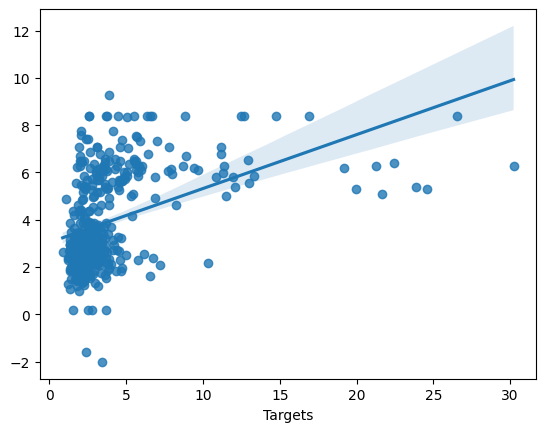

In [ ]:
sns.regplot(x=y_test, y=predictions)